In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.rand(len(x_data))

In [5]:
y_true = 0.5*x_data + 5 + noise

In [6]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y']) 
y_df.head(5)

,Y
0,5.105554
1,5.485492
2,5.864683
3,5.205544
4,5.579099


In [7]:
my_data = pd.concat([x_df, y_df], axis = 1)

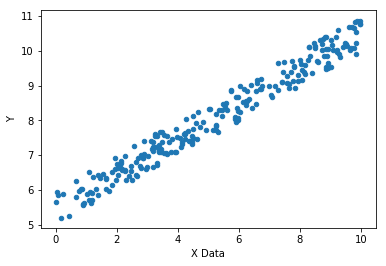

In [8]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [9]:
batch_size = 10
np.random.rand(2)

array([0.85994372, 0.9541957 ])

In [10]:
m = tf.Variable(0.70)
n = tf.Variable(0.59)

In [11]:
xph = tf.placeholder(tf.float32,[batch_size])

In [12]:
yph = tf.placeholder(tf.float32,[batch_size])

In [13]:
y_model = m*xph + 5 

In [14]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [16]:
init = tf.global_variables_initializer()


In [17]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict =feed)
    model_m, model_b = sess.run([m,n])

In [18]:
model_m


0.5916951

In [19]:
model_b

0.59

# TF_ESTIMATOR

In [20]:
feat_cols = [tf.feature_column.numeric_column('x', shape = [1])]

In [21]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmpjpowwhcf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002329E29AEB8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_eval , y_train, y_eval = train_test_split(x_data, y_true,test_size = 0.3 , random_state = 101)

In [24]:
x_eval.shape

(300000,)

In [25]:
 input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8 , num_epochs= None,shuffle=True)

In [26]:
 train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8 , num_epochs= 1000,shuffle=False)

In [27]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size = 8 , num_epochs= 1000,shuffle=False)

In [28]:
estimator.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rahul\AppData\Local\Temp\tmpjpowwhcf\model.ckpt.
INFO:tensorflow:loss = 491.85684, step = 1
INFO:tensorflow:global_step/sec: 500.558
INFO:tensorflow:loss = 29.655329, step = 101 (0.200 sec)
INFO:tensorflow:global_step/sec: 607.71
INFO:tensorflow:loss = 11.013945, step = 201 (0.170 sec)
INFO:tensorflow:global_step/sec: 659.589
INFO:tensorflow:loss = 17.55297, step = 301 (0.152 sec)
INFO:tensorflow:global_step/sec: 695.679
INFO:tensorflow:loss = 6.560081, step = 401 (0.139 sec)
INFO:tensorflow:global_step/sec: 774.031
INFO:tensorflow:loss = 3.7485957, step = 501 (0.129 sec)
INFO:tensorflow:global_step/sec: 739.479
INFO:tensorflow:loss = 6.653757, step = 601 (0.135 sec)
INFO:tensorflow:global_step/sec:

In [29]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-09-20:03:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjpowwhcf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-09-20:03:29
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.20644052, global_step = 1000, loss = 1.6515242


In [30]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-09-20:03:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjpowwhcf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-09-20:03:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.20518401, global_step = 1000, loss = 1.6414721


In [31]:
print(train_metrics)

{'average_loss': 0.20644052, 'loss': 1.6515242, 'global_step': 1000}


In [32]:
print("Eval METRICS")
print(eval_metrics)

Eval METRICS
{'average_loss': 0.20518401, 'loss': 1.6414721, 'global_step': 1000}


In [34]:
brand_new_data = np.linspace(0,10,10)

In [35]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle = False)

In [37]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjpowwhcf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.809084], dtype=float32)},
 {'predictions': array([5.48173], dtype=float32)},
 {'predictions': array([6.1543765], dtype=float32)},
 {'predictions': array([6.8270226], dtype=float32)},
 {'predictions': array([7.499669], dtype=float32)},
 {'predictions': array([8.172315], dtype=float32)},
 {'predictions': array([8.844961], dtype=float32)},
 {'predictions': array([9.517607], dtype=float32)},
 {'predictions': array([10.190254], dtype=float32)},
 {'predictions': array([10.8629], dtype=float32)}]

In [39]:
predictions  = []
for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjpowwhcf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
predictions

[array([4.809084], dtype=float32),
 array([5.48173], dtype=float32),
 array([6.1543765], dtype=float32),
 array([6.8270226], dtype=float32),
 array([7.499669], dtype=float32),
 array([8.172315], dtype=float32),
 array([8.844961], dtype=float32),
 array([9.517607], dtype=float32),
 array([10.190254], dtype=float32),
 array([10.8629], dtype=float32)]

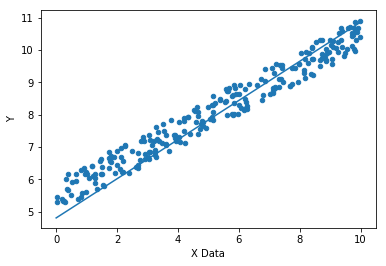

In [47]:
my_data.sample(n=250).plot(kind = 'scatter' , x = "X Data", y = "Y")
plt.plot(brand_new_data,predictions)